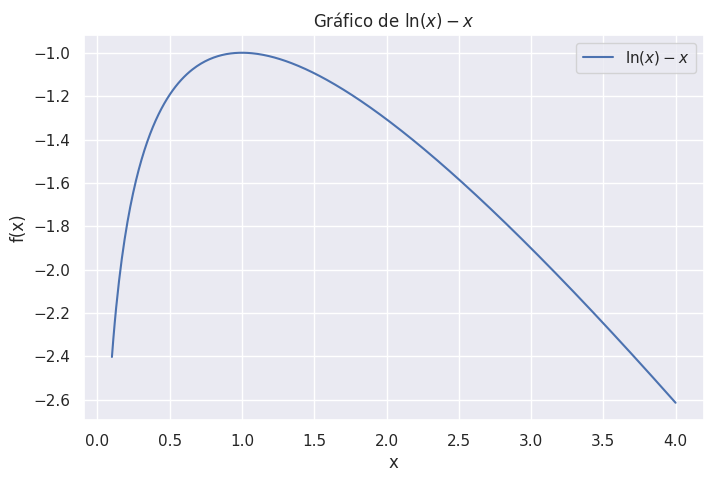

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo escuro do seaborn
sns.set_theme(style="darkgrid")

# Define os valores de x e calcula f(x) = ln(x) - x
x = np.linspace(0.1, 4, 400)
y = np.log(x) - x

# Cria o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$\ln(x) - x$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Gráfico de $\ln(x) - x$")
plt.legend()
plt.show()


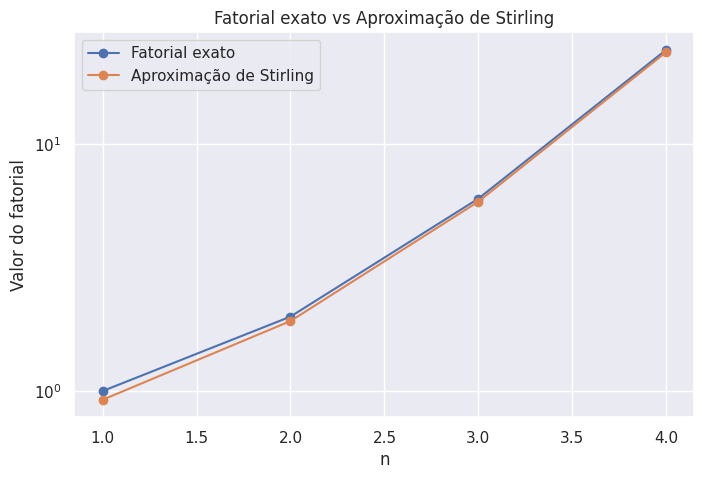

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Configura o estilo escuro do seaborn
sns.set_theme(style="darkgrid")

# Define o intervalo de n
n = np.arange(1, 5)
# Calcula o fatorial exato para cada n
fatorial_exato = np.array([math.factorial(i) for i in n])
# Calcula a aproximação de Stirling: sqrt(2*pi*n) * (n/e)**n
stirling = np.sqrt(2 * np.pi * n) * (n / np.e) ** n

# Cria o gráfico com escala logarítmica no eixo y
plt.figure(figsize=(8, 5))
plt.plot(n, fatorial_exato, 'o-', label="Fatorial exato")
plt.plot(n, stirling, 'o-', label="Aproximação de Stirling")


plt.yscale("log")
plt.xlabel("n")
plt.ylabel("Valor do fatorial")
plt.title("Fatorial exato vs Aproximação de Stirling")
plt.legend()
plt.show()


In [6]:
fatorial_exato

array([     1,      2,      6,     24,    120,    720,   5040,  40320,
       362880])

In [7]:
stirling

array([9.22137009e-01, 1.91900435e+00, 5.83620959e+00, 2.35061751e+01,
       1.18019168e+02, 7.10078185e+02, 4.98039583e+03, 3.99023955e+04,
       3.59536873e+05])

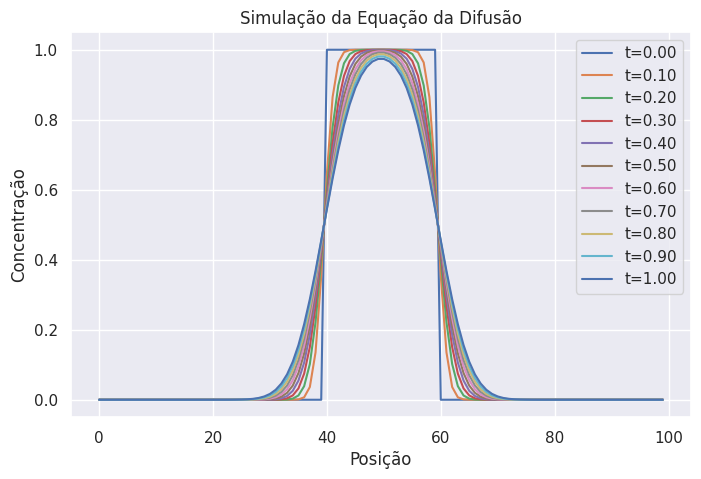

In [5]:
def simular_difusao(u0, D, dx, dt, t_max):
    """
    Simula a equação da difusão 1D usando o método de diferenças finitas.

    Parâmetros:
    u0 : array 1D
        Condição inicial.
    D : float
        Coeficiente de difusão.
    dx : float
        Passo espacial.
    dt : float
        Passo temporal.
    t_max : float
        Tempo máximo de simulação.

    Retorna:
    u : array 2D
        Solução da equação da difusão ao longo do tempo.
    """
    u = u0.copy()
    u_new = u0.copy()
    n = len(u0)
    r = D * dt / dx**2

    # Verifica a condição de estabilidade
    if r > 0.5:
        raise ValueError("A condição de estabilidade não é satisfeita: D * dt / dx^2 deve ser <= 0.5")

    # Lista para armazenar a solução ao longo do tempo
    sol = [u0.copy()]

    t = 0
    while t < t_max:
        for i in range(1, n-1):
            u_new[i] = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])
        u[:] = u_new[:]
        sol.append(u.copy())
        t += dt

    return np.array(sol)

# Exemplo de uso
u0 = np.zeros(100)
u0[40:60] = 1  # Condição inicial: pulso no centro
D = 0.1
dx = 0.1
dt = 0.01
t_max = 1.0

sol = simular_difusao(u0, D, dx, dt, t_max)

# Visualização da solução
plt.figure(figsize=(8, 5))
for i in range(0, len(sol), len(sol)//10):
    plt.plot(sol[i], label=f"t={i*dt:.2f}")
plt.xlabel("Posição")
plt.ylabel("Concentração")
plt.title("Simulação da Equação da Difusão")
plt.legend()
plt.show()

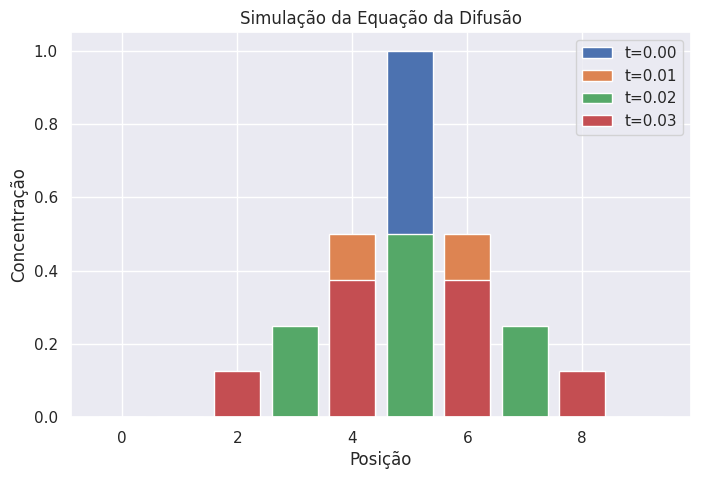

In [19]:

# Exemplo de uso
size=10
u0 = np.zeros(size)
u0[5:6] = 1  # Condição inicial: pulso no centro
categorias=list(range(size))
D = 0.5
dx = 0.1
dt = 0.01
t_max = 1.0

sol = simular_difusao(u0, D, dx, dt, 3*dt)

# Visualização da solução
plt.figure(figsize=(8, 5))
for i in range(0, len(sol)):
    plt.bar(categorias,sol[i], label=f"t={i*dt:.2f}")
plt.xlabel("Posição")
plt.ylabel("Concentração")
plt.title("Simulação da Equação da Difusão")
plt.legend()
plt.show()